* 主要目标：探索房价及各个变量的分布情况，及各个变量之间的相关性

        参考 1.https://www.kaggle.com/juliencs/house-prices-advanced-regression-techniques/a-study-on-regression-applied-to-the-ames-dataset/notebook
             2. https://www.kaggle.com/yadavsarthak/house-prices-advanced-regression-techniques/you-got-this-feature-engineering-and-lasso/comments
             3. https://www.kaggle.com/xchmiao/house-prices-advanced-regression-techniques/detailed-data-exploration-in-python
        

In [1]:
import pandas as pd 
df = pd.read_csv('data/train.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

/home/xiaqiang/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

/home/xiaqiang/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


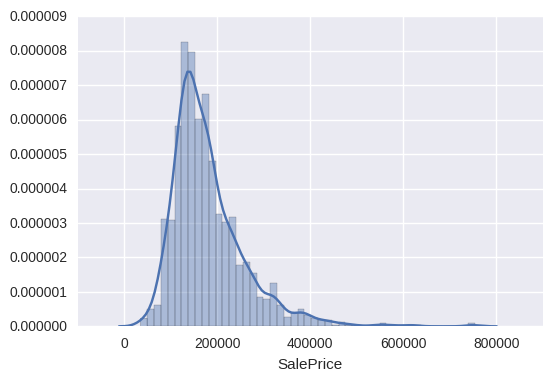

In [5]:
# 房价的分布
sns.distplot(df['SalePrice'])

In [6]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
df['SalePrice'].median()

163000.0

In [8]:
from scipy.stats import skew
skew(df['SalePrice'])

1.880940746034036

房价分布略微右倾,大部分房子价格都在170000一下，有少部分超过400000美元的，他们是outlier先删除

In [9]:
df.drop(df[df["SalePrice"] > 400000].index, inplace=True)

/home/xiaqiang/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


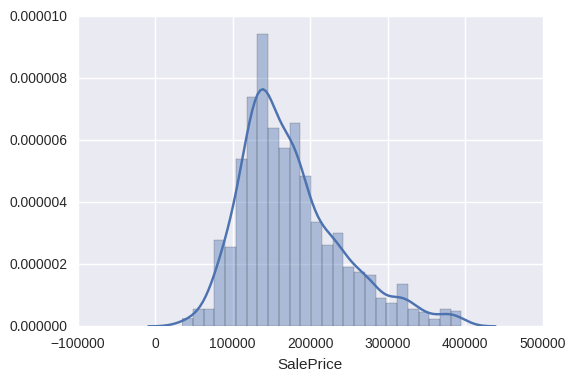

In [10]:
sns.distplot(df['SalePrice'])

## 数值型特征分析

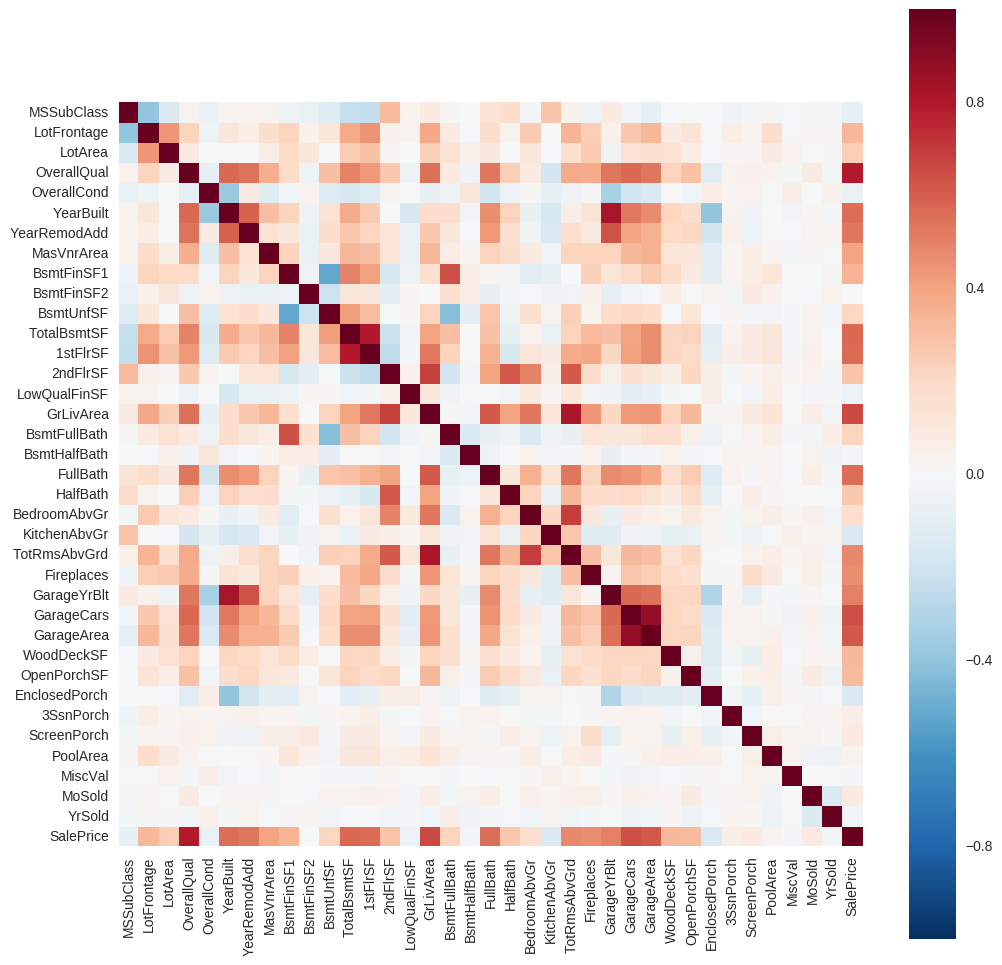

In [11]:
# 查看一下各个数值型特征间的相关性
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [12]:
# 他们与房价之间的相关性
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7947840627003911
GrLivArea: 	0.6635790850049368
GarageCars: 	0.646759484448994
GarageArea: 	0.6244916696661439
TotalBsmtSF: 	0.575020037645881
1stFlrSF: 	0.5644978975027521
YearBuilt: 	0.5583378698069553
FullBath: 	0.5563109331354854
YearRemodAdd: 	0.5385470456433868
GarageYrBlt: 	0.5070035224440772
TotRmsAbvGrd: 	0.4803535823264262
Fireplaces: 	0.46557196292482056
MasVnrArea: 	0.4027172186198039
BsmtFinSF1: 	0.33643977809310294
LotFrontage: 	0.33483742155685164
WoodDeckSF: 	0.3235539308400472
OpenPorchSF: 	0.31498359104717744
2ndFlrSF: 	0.2828588565318107
HalfBath: 	0.26628022567014925
LotArea: 	0.2479222507567174
BsmtFullBath: 	0.22636761950194365
BsmtUnfSF: 	0.21227042315179093
BedroomAbvGr: 	0.16616635264360669
EnclosedPorch: 	-0.14709252890306004
KitchenAbvGr: 	-0.14584398798879328
ScreenPorch: 	0.09258341164643348
MoSold: 	0.08716268464409226
MSSubClass: 	-0.08070262608431292
OverallCon

房价和这些特征有比较大相关系数：OverallQual, GrLivArea(GarageCars), GargeArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea , Fireplaces 但是它们两两之间有较大的相关性

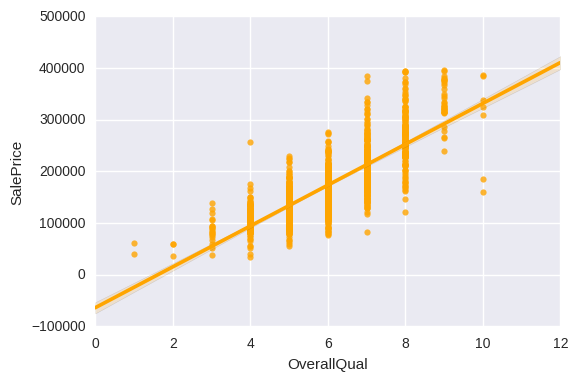

In [13]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df, color = 'Orange')

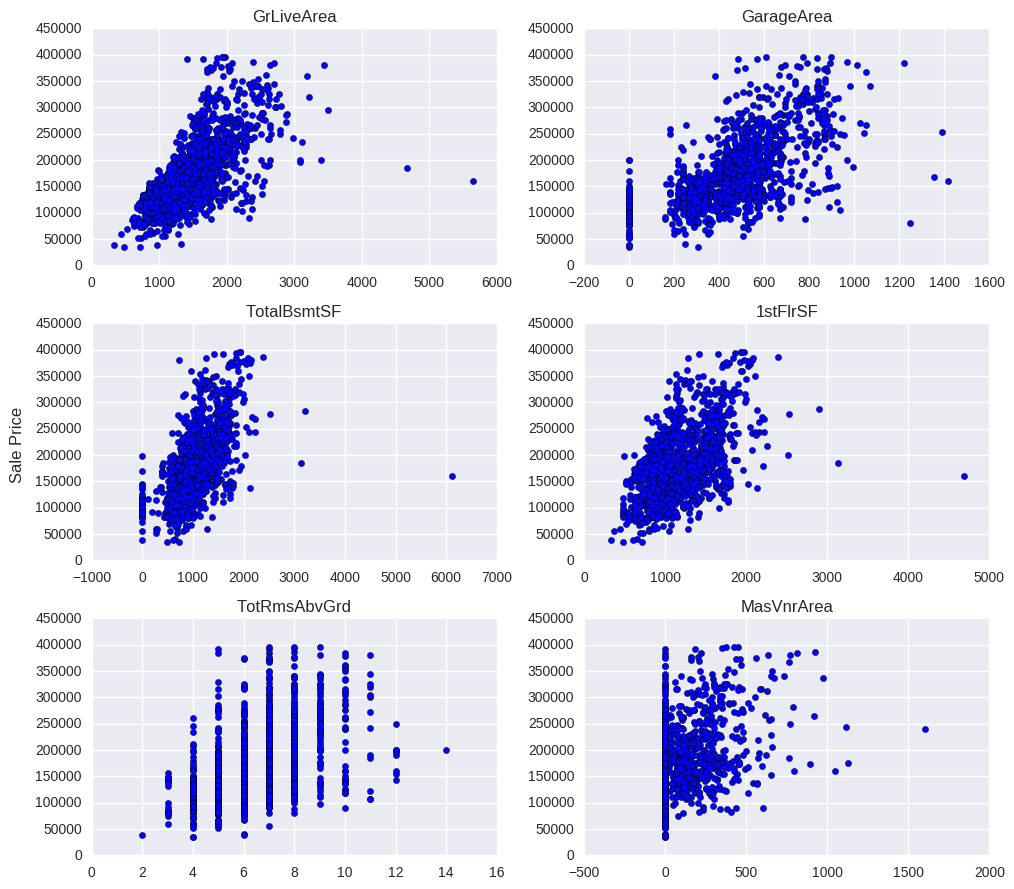

In [14]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = df.SalePrice.values
axarr[0, 0].scatter(df.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(df.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

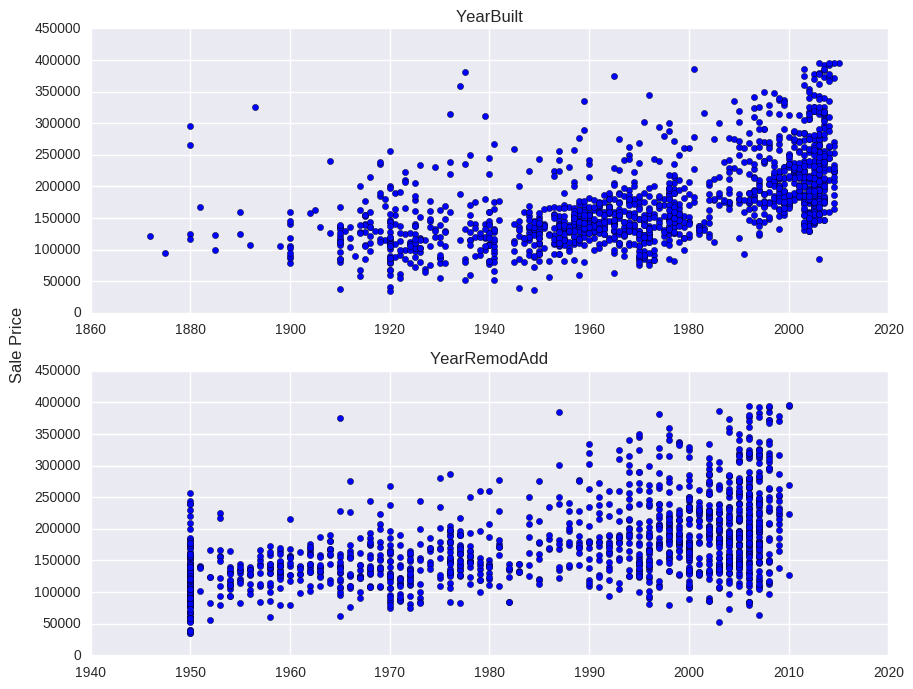

In [15]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(df.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(df.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

## 分类变量分析

In [16]:
print(df.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


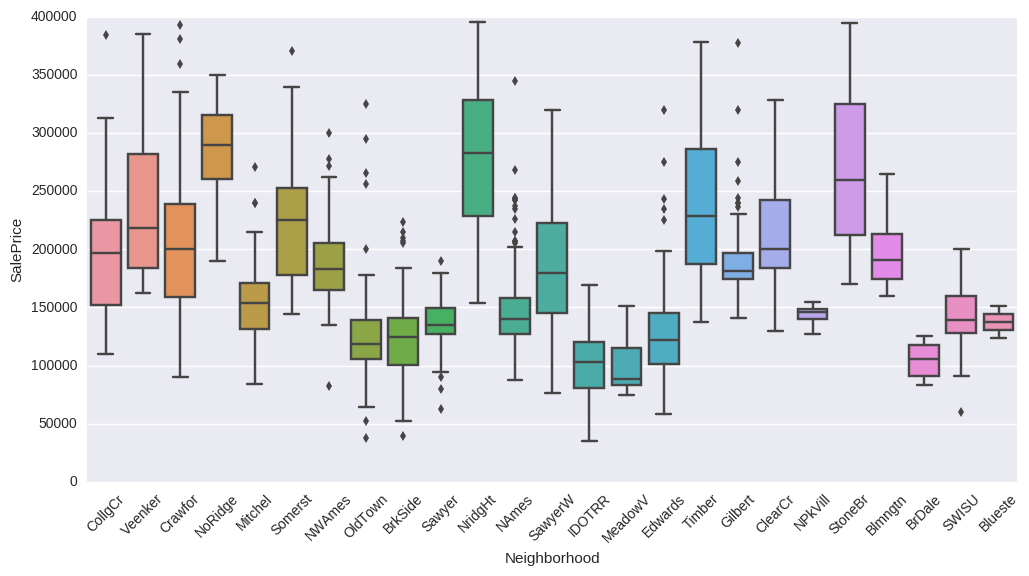

In [18]:
# Neighborhood 变量与房价
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

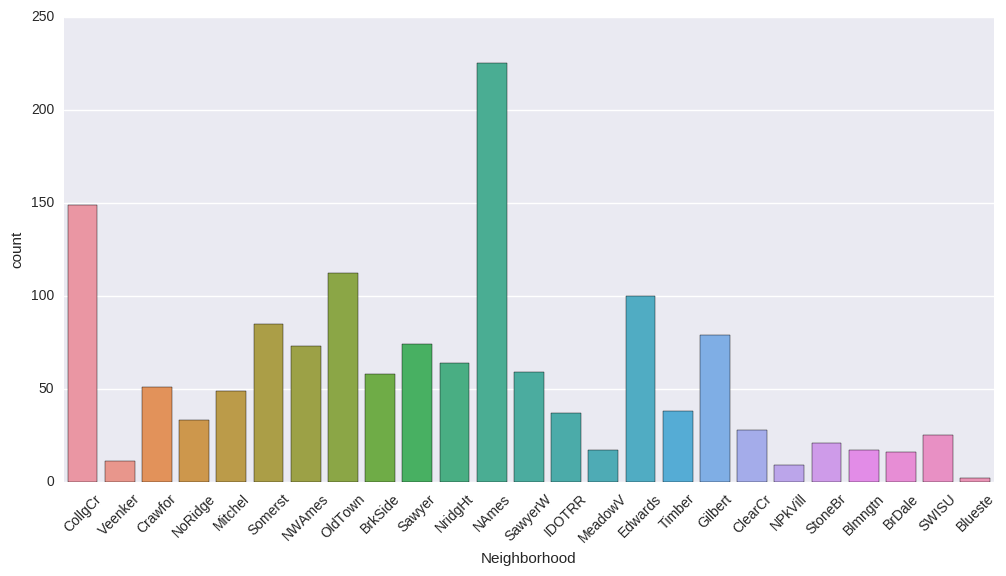

In [19]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = df)
xt = plt.xticks(rotation=45)

### 房价与销售情况



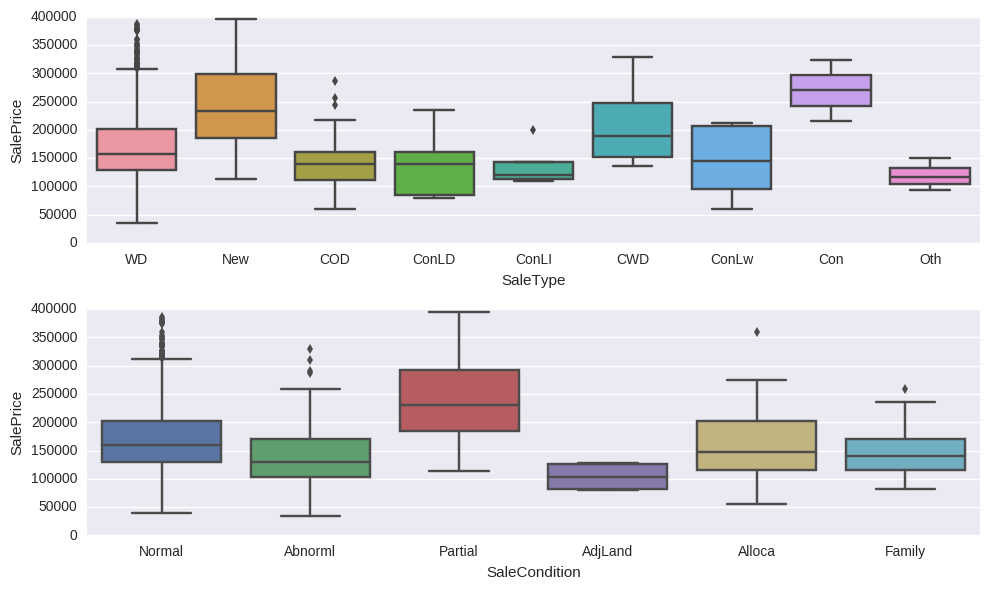

In [20]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df, ax = ax[1])
plt.tight_layout()

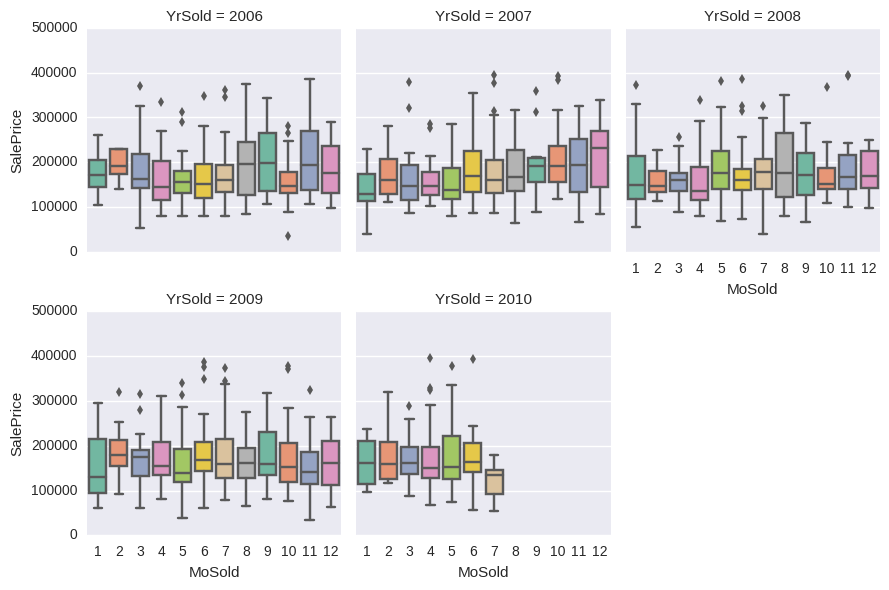

In [21]:
g = sns.FacetGrid(df, col = 'YrSold', col_wrap = 3)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

似乎售卖时间与房价影响并不大

### Housing Condition

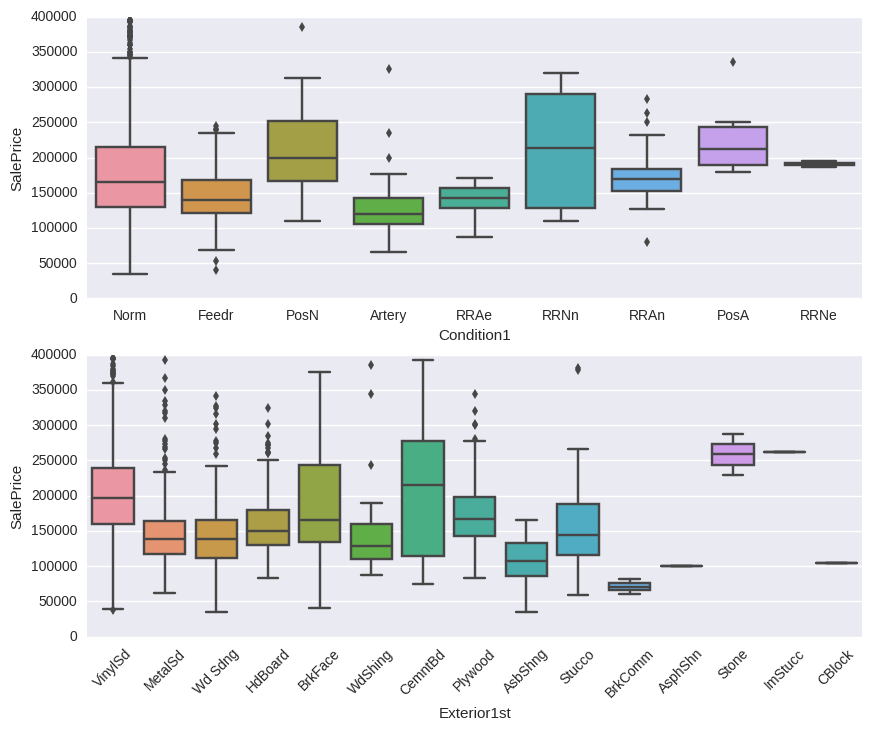

In [22]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

### Basement Conditions

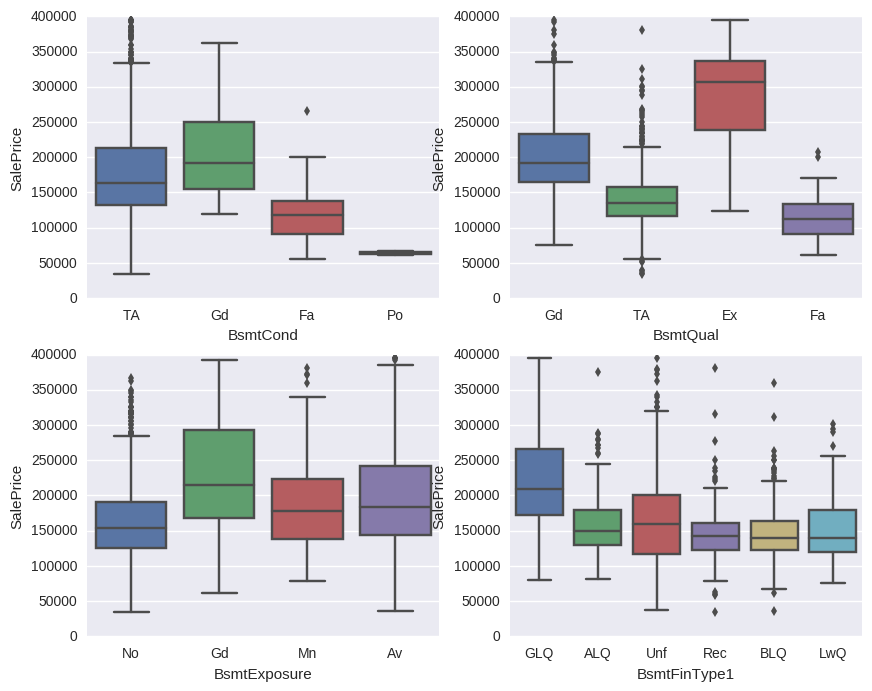

In [23]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = df, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = df, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = df, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = df, ax = ax[1, 1])

### Home Functionality

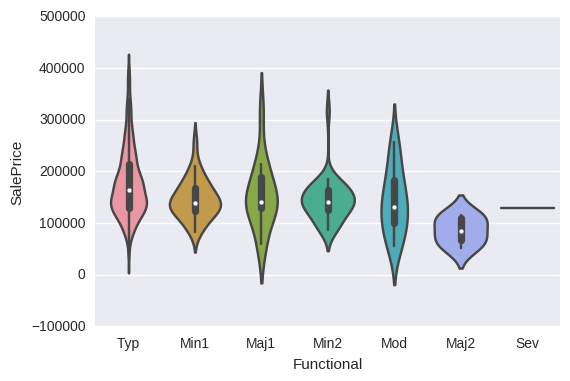

In [24]:
sns.violinplot('Functional', 'SalePrice', data = df)

### FirePlaceQu


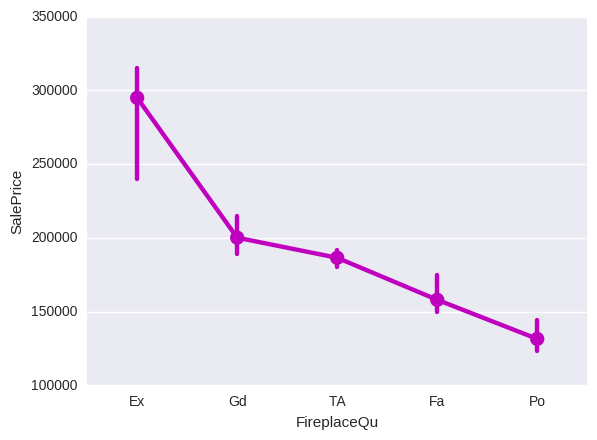

In [27]:
import numpy as np
sns.factorplot('FireplaceQu', 'SalePrice', data = df, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

In [28]:
pd.crosstab(df.Fireplaces, df.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,14,28,314,20,255
2,2,4,49,0,51
3,1,1,2,0,1


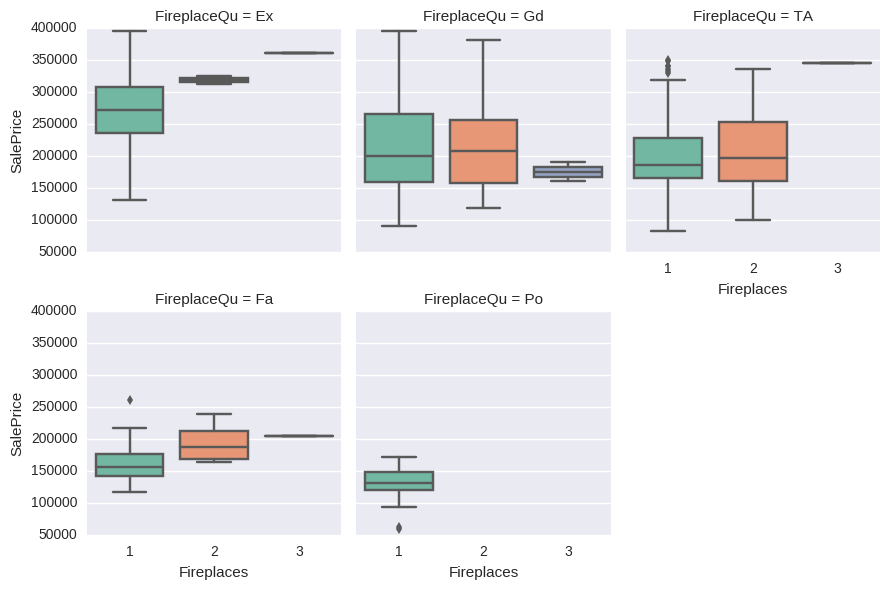

In [29]:
g = sns.FacetGrid(df, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

### Heating

In [30]:
pd.crosstab(df.HeatingQC, df.CentralAir)

CentralAir,N,Y
HeatingQC,,
Ex,8,705
Fa,24,25
Gd,13,228
Po,1,0
TA,49,379


In [31]:
pd.crosstab(df.HeatingQC, df.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
HeatingQC,,,,,
Ex,15,14,239,4,154
Fa,0,1,13,1,5
Gd,2,3,45,5,57
TA,0,15,68,10,91


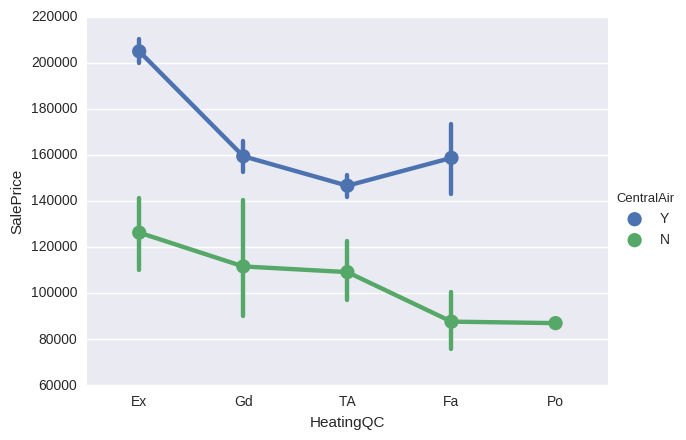

In [32]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = df, 
             size = 4.5, aspect = 1.4)

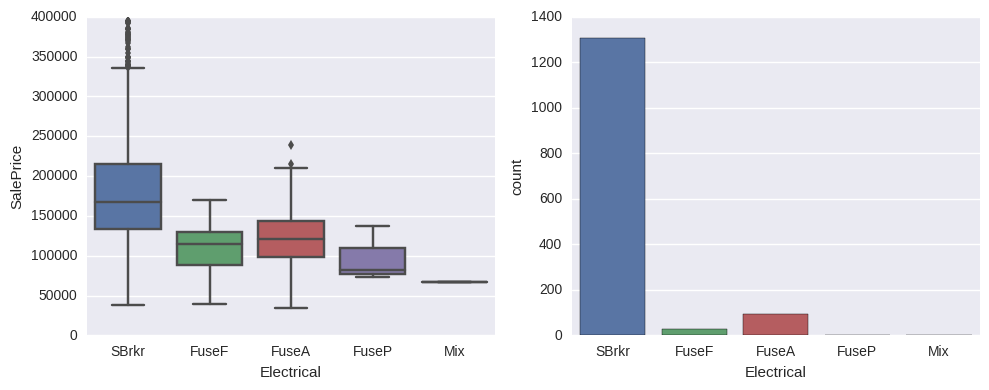

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('Electrical', 'SalePrice', data = df, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = df)
plt.tight_layout()

### Kitchen Quality

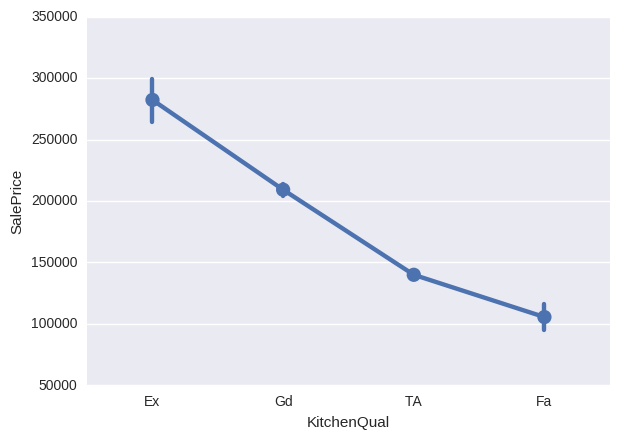

In [34]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = df, order = ['Ex', 'Gd', 'TA', 'Fa'])

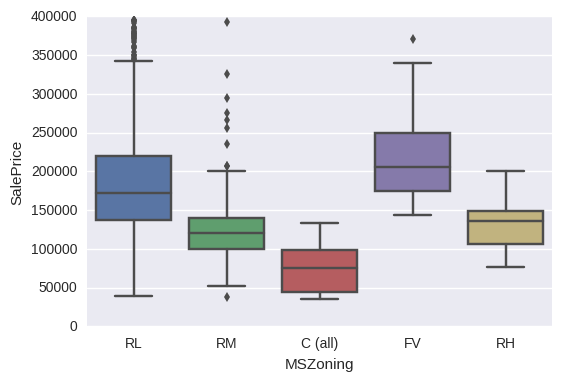

In [35]:
# MSZonig
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)

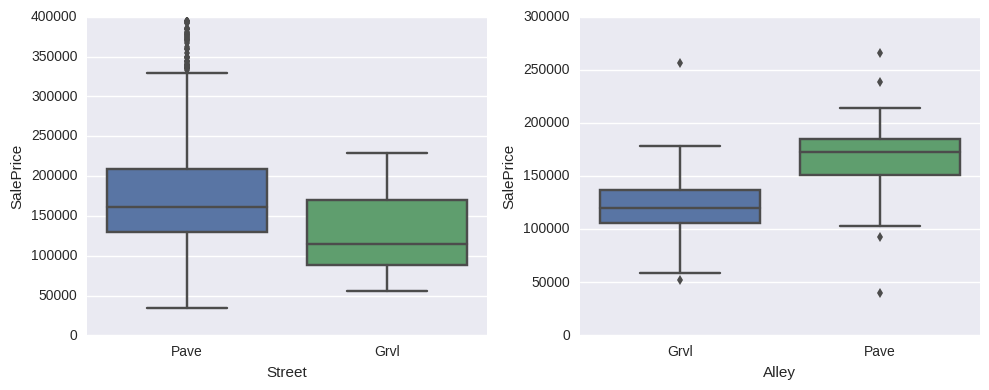

In [36]:
## Street & Alley Access
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = df, ax = ax[1])
plt.tight_layout()

In [37]:
print("The NA's in Alley is: ", df['Alley'].isnull().sum())
print("\nThere are so many NA's in Alley. When Alley is NA, Street = ", 
      df[df.Alley.notnull()].Street.unique())
print("\n", pd.crosstab(df.Street, df.Alley))

The NA's in Alley is:  1341

There are so many NA's in Alley. When Alley is NA, Street =  ['Pave']

 Alley   Grvl  Pave
Street            
Pave      50    41
